In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import time

import sys
sys.path.append('../')
from src.models.hubbard_model import *
from src.evolution.cpfs_compiled import *

import matplotlib.pyplot as plt
# plt settings
plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":11})          # specify font size here

In [3]:
H_hub_wc, A_hub_wc, B_hub_wc = weak_coupling_hubbard_model(size=8, alpha= 0.001)

time_ticks = np.logspace(0,3, num=100)
nsteps = 10000

start_time = time.time()

data_CPF1_errors_hub_wc = data_CPF_symp_error(1, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)
data_CPF2_errors_hub_wc = data_CPF_symp_error(2, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 1.722 mins


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_3902/2878972371.py:29: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF1_rsteps_error_hub_wc   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_3902/2878972371.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF2_rsteps_error_hub_wc   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_3902/2878972371.py:39: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[30:], (x[30:]/80000)**3, color='red',   label='$\propto 

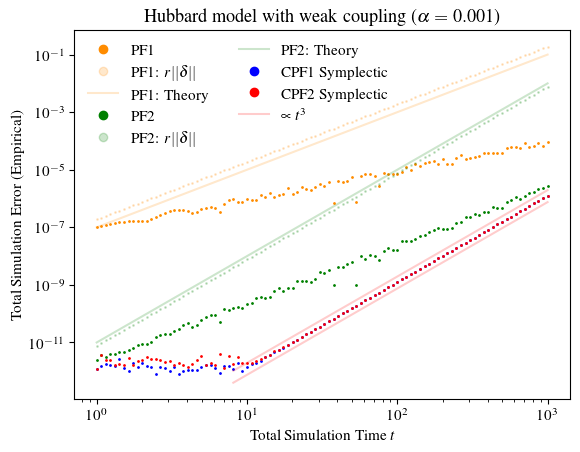

In [4]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)


y_PF1_step_error_hub_wc = [data_CPF1_errors_hub_wc[i][0] for i in range(0,num_time_ticks)]
y_PF1_error_hub_wc      = [data_CPF1_errors_hub_wc[i][2] for i in range(0,num_time_ticks)]
y_CPF1_error_hub_wc     = [data_CPF1_errors_hub_wc[i][3] for i in range(0,num_time_ticks)]

y_PF2_step_error_hub_wc = [data_CPF2_errors_hub_wc[i][0] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wc      = [data_CPF2_errors_hub_wc[i][2] for i in range(0,num_time_ticks)]
y_CPF2_error_hub_wc     = [data_CPF2_errors_hub_wc[i][3] for i in range(0,num_time_ticks)]



alpha = 0.001
x = time_ticks
r = nsteps

y_PF1_error_scaling = r*(alpha)*((x/r)**2)
y_PF2_error_scaling = r*(alpha)*((x/r)**3)


y_PF1_rsteps_error_hub_wc = list(r*np.array(y_PF1_step_error_hub_wc))
y_PF2_rsteps_error_hub_wc = list(r*np.array(y_PF2_step_error_hub_wc))


plt.loglog(x, y_PF1_error_hub_wc    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_PF1_rsteps_error_hub_wc   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF1_error_scaling , color='darkorange',  label='PF1: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_PF2_error_hub_wc    , '.', color='green',  label='PF2', markersize=2)
plt.loglog(x, y_PF2_rsteps_error_hub_wc   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF2_error_scaling   , color='green',  label='PF2: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_CPF1_error_hub_wc, '.', color='blue',  label='CPF1 Symplectic', markersize=2)
plt.loglog(x, y_CPF2_error_hub_wc, '.', color='red',   label='CPF2 Symplectic', markersize=2)

plt.loglog(x[30:], (x[30:]/80000)**3, color='red',   label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x[30:], (x[30:]/110000)**3, color='red', markersize=2, alpha=0.2)

plt.xlabel('Total Simulation Time $t$')
plt.ylabel('Total Simulation Error (Empirical)')


ax.legend(markerscale=6, loc='upper left', ncol=2, frameon=False)

plt.title('Hubbard model with weak coupling ($\\alpha=0.001$)')
plt.show()

fig.savefig('../plots/CPFs_hub_wc.pdf', dpi=300, bbox_inches='tight', transparent=False)